# Face Detection
Artificial Intelligence and Machine Learning 1

Submission date/time: __18 July 2023, 3PM__



---





## Step 1: Import Machine Learning Libraries for this task

Check all the

`import [library full name] as [short name]` 

in the skeleton code. If you use any off-line IDE, such as
PyCharm, make sure you pre-installed all the required Python libraries for the machine learning task. Please
contact the tutor if you need any technical support to set up your coding environment. 

If you need any extra tools/libraries, please also add them here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from PIL import Image

#Some more libraries of your choice goes here

## Step 2: Data Preparation
* Mount your google drive to this project
* Load files: `positive_patches.npy` and `negative_patches.npy`
* The dataset has __13233__ positive data and __30000__ negative data
* Reshape the raw patches (1-D 2914 pixels per picture) as 2-D __62*47__ image patches
* Display some positive samples and negative samples 

(13233, 62, 47)
(30000, 62, 47)


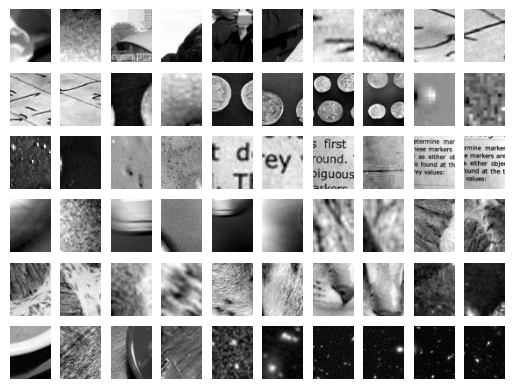

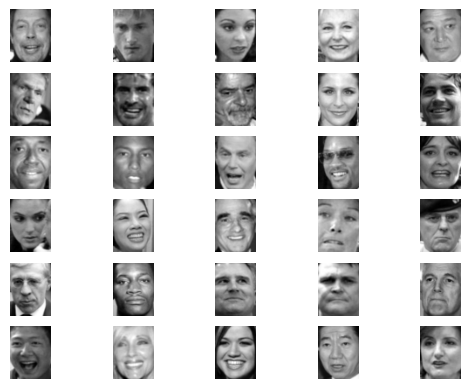

In [3]:
#Add your code here
positive_patches = np.load("positive_patches.npy")
reshaped_positive = np.reshape(positive_patches,(-1,62,47))

negative_patches = np.load("negative_patches.npy")
reshaped_negative = np.reshape(negative_patches,(-1,62,47))


print(reshaped_positive.shape)
print(reshaped_negative.shape)

fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(reshaped_negative[500 * i], cmap='gray')
    axi.axis('off')

fig, ax = plt.subplots(6, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(reshaped_positive[250 * i], cmap='gray')
    axi.axis('off')


## Step 3: Feature Extraction and Binary Labels
We will use a Sci-kit Learn Image Processing (A Wrap version of the OpenCV) package to extract the 2D HoG features and use them as the feature space for the machine learning algorithms.

Also, face detection uses binary classification algorithms, which requires feature space `X` and labels `y`



X>  [[0.25548458 0.29600388 0.07282983 ... 0.03964323 0.04323808 0.08991418]
 [0.06110074 0.02669912 0.13924529 ... 0.07784683 0.05735707 0.17604993]
 [0.26090473 0.26090473 0.0086068  ... 0.0026164  0.0055565  0.00378414]
 ...
 [0.0641823  0.02415647 0.04330033 ... 0.02380287 0.05790631 0.03625628]
 [0.0909658  0.06683258 0.03511058 ... 0.00877273 0.02958801 0.04746254]
 [0.11721843 0.00336082 0.02127176 ... 0.00116097 0.00191511 0.01836849]]
y>  [1. 1. 1. ... 0. 0. 0.]


(-0.5, 46.5, 61.5, -0.5)

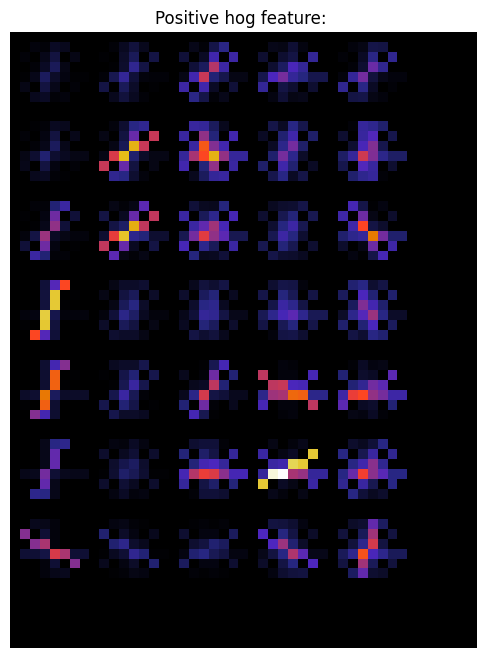

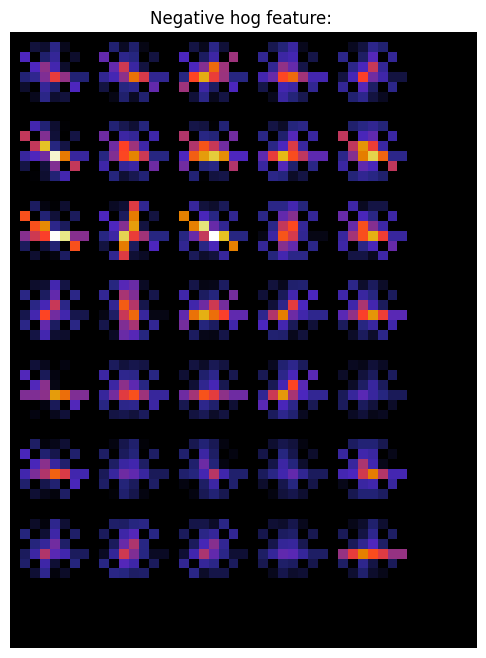

In [4]:
#inspired by https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.14-Image-Features.ipynb
from itertools import chain
X = np.array([feature.hog(im)
                    for im in chain(reshaped_positive,
                                    reshaped_negative)])
y = np.zeros(X.shape[0])
y[:reshaped_positive.shape[0]] = 1

print("X> ",X)
print("y> ", y)

#show visualisation of hog features of one positive sample
hog_vec, hog_vis = feature.hog(reshaped_positive[4],visualize=True)
fix,ax = plt.subplots(figsize=(8,8))
ax.imshow(hog_vis,cmap="CMRmap")
ax.set_title("Positive hog feature: ")
ax.axis("off")

#show visualisation of hog features of one negative sample
hog_vec, hog_vis = feature.hog(reshaped_negative[8],visualize=True)
fix,ax = plt.subplots(figsize=(8,8))
ax.imshow(hog_vis,cmap="CMRmap")
ax.set_title("Negative hog feature: ")
ax.axis("off")

## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set. Remember to shuffle them 
* Use some suitable machine learning algorithms (which one?) to create a classifier.
* If the training takes too long, you may consider saving your trained model 

In [5]:
#the following code contains two different classifiers tested, one being a support vector machine, the other being the KNN classifier. 
#both are compared at the end in part of the notebook using markdown, confusion matrixes are drawn for both classifiers with an explanation and comparison.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

#scale data using minmaxscaler()
minMaxScaler = MinMaxScaler()

#Scale training and test datasets
X_train_scaled = minMaxScaler.fit_transform(X_train)
X_test_scaled = minMaxScaler.transform(X_test)

#testing and training using the K-Nearest neighbour classifier on a scaled dataset
KNN = KNeighborsClassifier()

face_detector_KNN = KNN.fit(X_train, y_train)

training_accuracy_KNN = face_detector_KNN.score(X_train_scaled, y_train)
testing_accuracy_KNN = face_detector_KNN.score(X_test_scaled, y_test)

print("accuracy of KNN classifier on scaled training dataset: ", training_accuracy_KNN)
print("accuracy of KNN classifier on scaled testing dataset: ", testing_accuracy_KNN, "\n\n")

#working out cross valication score for KNN classifier
crossvalidation_KNN = cross_val_score(KNN, X_test_scaled, y_test)
print ("cross validation of KNN classifier: ", crossvalidation_KNN)

#testing and training using the support vector machine classifier on a scaled dataset

SVM = SVC()

face_detector_svm_2 = SVM.fit(X_train_scaled, y_train)

#working out cross validation score for SVM classifier.

training_accuracy_scaled_svm = SVM.score(X_train_scaled, y_train)
testing_accuracy_scaled_svm = SVM.score(X_test_scaled, y_test)

print('accuracy of svm classifier on scaled training set: ', training_accuracy_scaled_svm)
print('accuracy of svm classifier on scaled test set: ', testing_accuracy_scaled_svm, "\n\n")

crossvalidation_SVM = cross_val_score(SVM, X_test_scaled, y_test)
print("cross validation of SVM classifier: ", crossvalidation_SVM)

#cross_val_score(GaussianNB(), X_train, y_train)
import pickle
#from sklearn.svm import LinearSVC
#from sklearn.model_selection import GridSearchCV
#clf=LogisticRegression(solver='liblinear')
#grid = GridSearchCV(LinearSVC(max_iter=100000), {'C': [1.0, 2.0, 4.0, 8.0]})
#grid.fit(X_train, y_train)
#print(grid.best_score_)
#print(grid.best_params_)

#model = grid.best_estimator_
#model.fit(X_train, y_train)
#print(model)

filename = "saved_model(svm).pickle"
pickle.dump(face_detector_svm_2, open(filename, 'wb'))

accuracy of KNN classifier on scaled training dataset:  0.9964840858623242
accuracy of KNN classifier on scaled testing dataset:  0.995651771671755 


cross validation of KNN classifier:  [0.99629972 0.99306198 0.99537465 0.99167438 0.99352152]
accuracy of svm classifier on scaled training set:  0.999259807549963
accuracy of svm classifier on scaled test set:  0.9970395041169395 


cross validation of SVM classifier:  [0.99768733 0.99491212 0.99491212 0.99398705 0.99490976]


## Step 5: Performance Validation

* Use test dataset to calculate the confusion matrix
* If you use more than one algorithm or carried out some comparison tests, generate multiple confusion matrices for each case

SVM Predictions:  [1.] , [0.]
KNN Predictions:  [1.] , [0.]
KNN Confusion Matrix:  [[7523    4]
 [  43 3239]]
KNN Confusion matrix heatmap: 





SVM Confusion Matrix:  [[7524    3]
 [  29 3253]]



SVM Confusion matrix heatmap: 


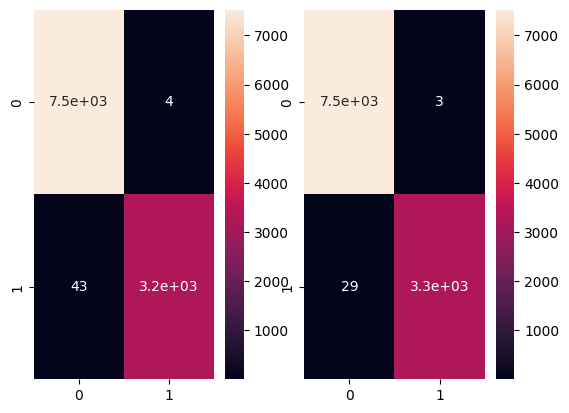

face is detected
face not detected


In [6]:
#section 5, performance validation, drawing heatmaps using seaborn to visualise the confusion matrices
import seaborn as sns
imagePos = np.array([feature.hog(reshaped_positive[4])])
imageNeg = np.array([feature.hog(reshaped_negative[5])])
predictPos = SVM.predict(imagePos)
predictNeg = SVM.predict(imageNeg)
print("SVM Predictions: ",predictPos, ",", predictNeg)

y_prediction = SVM.predict(X_test_scaled)

#graphicing of true and false positive rates of the support vector machine
predictPosKNN = KNN.predict(imagePos)
predictNegKNN = KNN.predict(imageNeg)
print("KNN Predictions: ",predictPosKNN, ",", predictNegKNN)

y_prediction_KNN = KNN.predict(X_test_scaled)

conf_matrix_knn = confusion_matrix(y_test, y_prediction_KNN)
print ("KNN Confusion Matrix: ", conf_matrix_knn)

print("KNN Confusion matrix heatmap: ")

print("\n\n\n\n")

conf_matrix_svm = confusion_matrix(y_test, y_prediction)

print("SVM Confusion Matrix: ",conf_matrix_svm)
print("\n\n")

print("SVM Confusion matrix heatmap: ")

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(conf_matrix_knn, ax=ax1, annot=True)
sns.heatmap(conf_matrix_svm, ax=ax2, annot=True)
plt.show()
#function to check if a face is detected

def face_detected(predict):
    if (predict == 1):
        return "face is detected"
    else:
        return "face not detected"
    

print (face_detected(predictPos))
print (face_detected(predictNeg))

## Results overview and analysis

for the results overview/analysis, please consult the documentation included in the zip "ReadMe.docx".